In [ ]:
!unrar x "/content/data.rar"

In [5]:
import tensorflow as tf 
import os
import cv2
import imghdr


In [5]:
data_dir = "data"
# labels = ["capacitor","resistor"]
# if not os.path.exists(data_dir):
#     os.mkdir(data_dir)
# for label in labels:
#     label_path = os.path.join(data_dir,label)
#     if not os.path.exists(label):
#         os.mkdir(label_path)

In [6]:
img_extentions = ["jpeg","jpg","png"]
for label in labels:
    for image in os.listdir(os.path.join(data_dir,label)):
        try:
            image_path = os.path.join(data_dir,label,image)
            img = cv2.imread(image_path)
            img_ext = imghdr.what(image_path)
            if not img_ext in img_extentions:
                os.remove(image_path)
        except Exception as e:
            print("erreur : ",e)
            # os.remove(image_path)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 6811 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()
len(batch[0])

32

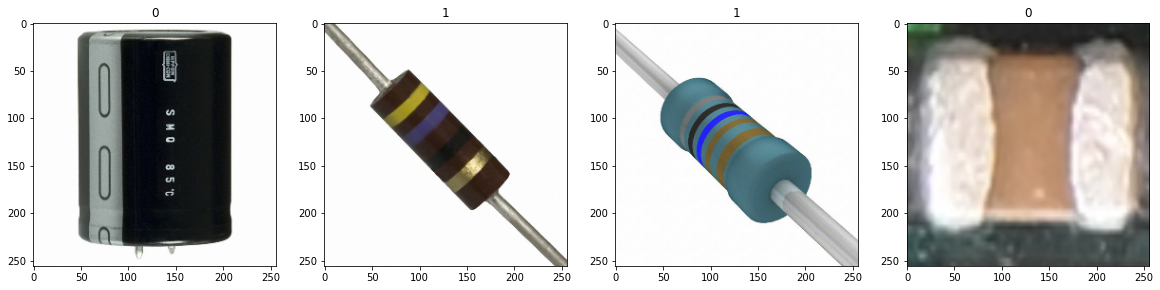

In [11]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx,image in enumerate(batch[0][:4]):
    ax[idx].imshow(image.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
print("la valeur maximum de l'image est : " ,batch[0].max())
print("la valeur minimum de l'image est : " ,batch[0].min())

la valeur maximum de l'image est :  255.0
la valeur minimum de l'image est :  0.0


In [13]:
data = data.map(lambda x,y: (x/255,y))

In [14]:
scaled_batch = data.as_numpy_iterator()

In [15]:
batch_new = scaled_batch.next()

In [16]:
print("la valeur maximum de l'image est : " ,batch_new[0].max())
print("la valeur minimum de l'image est : " ,batch_new[0].min())

la valeur maximum de l'image est :  1.0
la valeur minimum de l'image est :  0.0


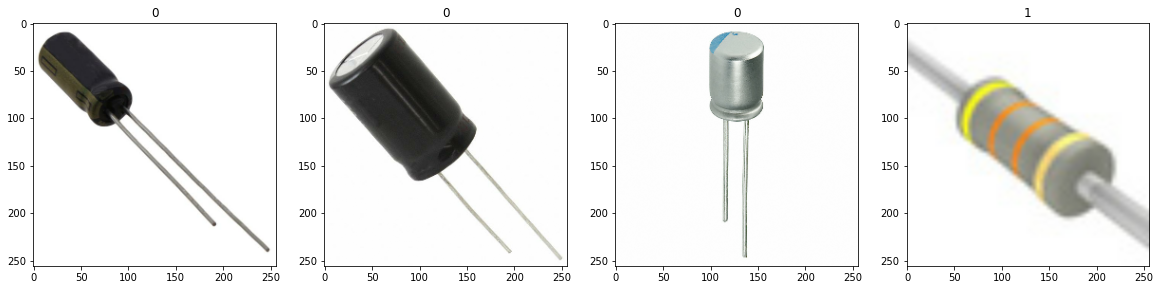

In [17]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx,image in enumerate(batch_new[0][:4]):
    ax[idx].imshow(image)
    ax[idx].title.set_text(batch_new[1][idx])

In [18]:
train_size = int(len(data)*.7) 
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1) + 1

In [19]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip((train_size + val_size)).take(test_size)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten

In [22]:
model = Sequential([
    Conv2D(16,(3,3),1,activation="relu",input_shape=(256,256,3)),
    MaxPooling2D(),

    Conv2D(32,(3,3),1,activation="relu"),
    MaxPooling2D(),

    Conv2D(16,(3,3),1,activation="relu"),
    MaxPooling2D(),

    Flatten(),
    Dense(256,activation="relu"),
    Dense(1,activation="sigmoid")

])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [24]:
model.compile("adam",loss=tf.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [25]:
logdir = "logs"
if not os.path.exists(os.path.join(logdir)):
    os.mkdir(os.path.join(logdir))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train_data,epochs=20,validation_data=val_data,callbacks=[tensorboard_callback])

Epoch 1/20
149/149 [==============================] - 46s 246ms/step - loss: 0.2586 - accuracy: 0.8865 - val_loss: 0.1406 - val_accuracy: 0.9509
Epoch 2/20
149/149 [==============================] - 33s 221ms/step - loss: 0.1387 - accuracy: 0.9467 - val_loss: 0.1417 - val_accuracy: 0.9472
Epoch 3/20
149/149 [==============================] - 35s 232ms/step - loss: 0.1098 - accuracy: 0.9589 - val_loss: 0.1195 - val_accuracy: 0.9568
Epoch 4/20
149/149 [==============================] - 38s 248ms/step - loss: 0.0782 - accuracy: 0.9708 - val_loss: 0.1042 - val_accuracy: 0.9621
Epoch 5/20
149/149 [==============================] - 38s 252ms/step - loss: 0.0560 - accuracy: 0.9805 - val_loss: 0.1043 - val_accuracy: 0.9688
Epoch 6/20
149/149 [==============================] - 37s 241ms/step - loss: 0.0341 - accuracy: 0.9876 - val_loss: 0.1273 - val_accuracy: 0.9688
Epoch 7/20
149/149 [==============================] - 35s 235ms/step - loss: 0.0265 - accuracy: 0.9899 - val_loss: 0.1352 - val_ac

**3. plot performance**

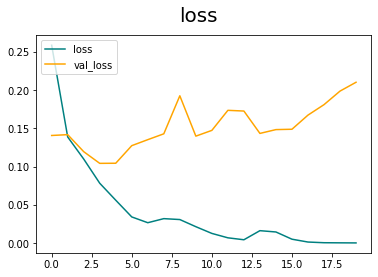

In [27]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal",label="loss")
plt.plot(hist.history["val_loss"],color="orange",label="val_loss")
fig.suptitle("loss",fontsize=20)
plt.legend(loc="upper left")
plt.show()

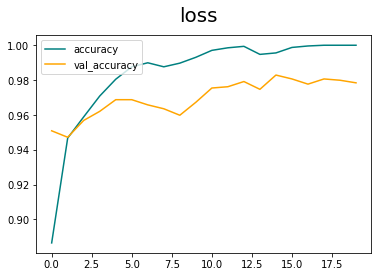

In [28]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal",label="accuracy")
plt.plot(hist.history["val_accuracy"],color="orange",label="val_accuracy")
fig.suptitle("loss",fontsize=20)
plt.legend(loc="upper left")
plt.show()

**4. sauvegarder le model**

In [29]:
model.save("cap_vs_res.h5")